In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
input_file = "../data/distance-matrix.9556.csv"
damds_out = "../data/damds-points.9556.txt"
distance_df = pd.read_csv(input_file, header=None)
damds_df = pd.read_csv(damds_out, usecols=[1, 2, 3], header=None, delim_whitespace=True)

In [10]:
mds_dist_df = euclidean_distances(damds_df, damds_df)

In [19]:
Y = np.matrix(mds_dist_df).getA1()
X = np.matrix(distance_df).getA1()

print("X size:", len(X))
print("Y size:", len(Y))

X size: 91317136
Y size: 91317136


In [33]:
sX = []
sY = []
for idx in range(len(X)):
    x = X[idx]
    y = Y[idx]
    if x <= 0.5 and x > 0:
        sX = np.append(sX, x)
        sY = np.append(sY, y)
    
print("sX size:", len(sX))
print("sY size:", len(sY))

sX size: 25032
sY size: 25032


Text(0.5,0.98,'Kernel Density Estimation of Score-Distance vs. MDS-Distance\nScore-Distance formula: (1.0 / score - 1.0 / max) * min * max / (max - min)\nMDS-Distance formula: Euclidean distance of x, y, z\nDataset: ../data/distance-matrix.9556.csv\n')

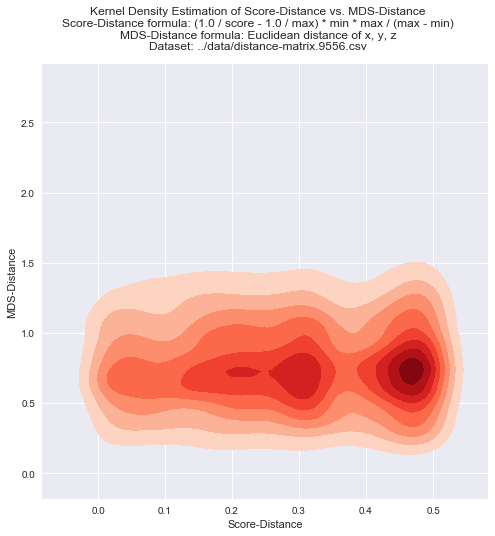

In [34]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(sX, sY,
                 cmap="Reds", shade=True, shade_lowest=False)
ax.set_xlabel("Score-Distance")
ax.set_ylabel("MDS-Distance")

f.suptitle(
    "Kernel Density Estimation of Score-Distance vs. MDS-Distance\n"
    "Score-Distance formula: (1.0 / score - 1.0 / max) * min * max / (max - min)\n"
    "MDS-Distance formula: Euclidean distance of x, y, z\n"
    "Dataset: " + input_file + "\n"
            )

In [35]:
f.savefig(input_file + "-kdeplot-n0-dot5.png", dpi=400)